Alireza Safarkhani 97101983
Shayan Ghaledar 97102271

در بلوک زیر ابتدا دیتا را خوانده و پس از شافل کردن به نسبت 80 به 20 بین آموزش و تست تقسیم کرده ایم. 3 ستون ویژگی داریم و یک ستون خروجی که میزان ازون هوا می باشد.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy.linalg import inv
from random import shuffle

os.chdir('C:/Users/MT/Downloads/MLV_LAB_2')

# Reading and splitting the data 

Ozon = pd.read_csv('ozon.csv')
Ozon = Ozon.to_numpy()
shuffle(Ozon)
train_data = Ozon[0:int(0.8*len(Ozon))]
test_data = Ozon[int(0.8*len(Ozon)): len(Ozon)+1]


X_train = train_data[:,0:3]
Y_train = train_data[:,3]
X_test = test_data[:,0:3]
Y_test = test_data[:,3]

در بلوک زیر ابتدا ستون 0 را طبق دستور کار به داده های آموزش اضافه می کنیم و سپس بتا را طبق دستور کار بدست می آوریم. در نهایت تخمین خروجی از ضرب ایکس و بتا حاصل شده است. دقت شود برای تخمین خروجی در داده های تست هم از همان بتایی که از داده های آموزش بدست امده استفاده می کنیم.در نهایت هم بتا پرینت شده است. 

In [2]:
# Calculating beta and y_hat

X = np.insert(X_train, 0, np.ones(len(X_train)), axis=1)
beta = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train)

y_hat_train = np.matmul(X,beta)


X_Test = np.insert(X_test, 0, np.ones(len(X_test)), axis=1)
y_hat_test = np.matmul(X_Test,beta)

print(beta)

[-4.68008803e+01  4.08976211e-02  1.42967515e+00 -3.17126947e+00]


در بلوک زیر خطا را طبق تعریف دستور کار پیاده سازی کرده ایم و ملاحظه می کنید که خطای آموزش و تست پرینت شده است که طبیعتا خطای داده های آموزش کمتر می باشد.

In [3]:
# Calculating RSS
RSS_train = np.matmul((Y_train - y_hat_train).T , (Y_train - y_hat_train))
RSS_train = RSS_train/len(Y_train)
print(RSS_train)

RSS_test = np.matmul((Y_test - y_hat_test).T , (Y_test - y_hat_test))
RSS_test = RSS_test/len(Y_test)
print(RSS_test)



367.67102406819237
440.36990775903627


در ادامه بایستی با واریانس های مختلف نویز گوسی به خروجی اضافه کنیم و بقیه کار مانند بلوک های قبلی هست و مجددا بتا و تخمین خروجی ها و در نهایت خطاها حساب شده است که مشاهده می شود خطا ها بیشتر می شوند و کماکان خطای آموزش از تست کمتر است.

In [4]:
# Noisy data
# Noise variance = 10
Noise = np.random.normal(0,10,len(Ozon))
train_noise = Noise[0:int(0.8*len(Ozon))]
test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]

Y_train_noisy = Y_train + train_noise
Y_test_noisy = Y_test + test_noise

beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
print(beta_noisy)

y_hat_train_noisy = np.matmul(X,beta_noisy)
y_hat_test_noisy = np.matmul(X_Test,beta_noisy)

# RSS 
RSS_train_noisy = np.matmul((Y_train_noisy - y_hat_train_noisy).T , (Y_train_noisy - y_hat_train_noisy))
RSS_train_noisy = RSS_train_noisy/len(Y_train_noisy)
print(RSS_train_noisy)

RSS_test_noisy = np.matmul((Y_test_noisy - y_hat_test_noisy).T , (Y_test_noisy - y_hat_test_noisy))
RSS_test_noisy = RSS_test_noisy/len(Y_test_noisy)
print(RSS_test_noisy)

[-5.29303691e+01  2.11212722e-02  1.51037840e+00 -2.84832346e+00]
462.3465500607768
503.1460532825307


در بلوک قبل با واریانس 10 نویز را اضافه کردیم. در چند بلوک بعدی با واریانس های 20 و 30 و 40 و 50 این کار را کرده ایم و بقیه کد مشابه هست. مشاهده شد که هرچقدر واریانس نویز زیاد تر می شود خطای آموزش و تست هم افزایش پیدا می کند.

In [5]:
# Noise variance = 20
Noise = np.random.normal(0,20,len(Ozon))
train_noise = Noise[0:int(0.8*len(Ozon))]
test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]

Y_train_noisy = Y_train + train_noise
Y_test_noisy = Y_test + test_noise

beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
print(beta_noisy)

y_hat_train_noisy = np.matmul(X,beta_noisy)
y_hat_test_noisy = np.matmul(X_Test,beta_noisy)

# RSS 
RSS_train_noisy = np.matmul((Y_train_noisy - y_hat_train_noisy).T , (Y_train_noisy - y_hat_train_noisy))
RSS_train_noisy = RSS_train_noisy/len(Y_train_noisy)
print(RSS_train_noisy)

RSS_test_noisy = np.matmul((Y_test_noisy - y_hat_test_noisy).T , (Y_test_noisy - y_hat_test_noisy))
RSS_test_noisy = RSS_test_noisy/len(Y_test_noisy)
print(RSS_test_noisy)

[-27.94378634   0.03949342   1.08635846  -2.56250201]
713.829340105618
1184.1908962481386


In [7]:
# Noise variance = 30
Noise = np.random.normal(0,30,len(Ozon))
train_noise = Noise[0:int(0.8*len(Ozon))]
test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]

Y_train_noisy = Y_train + train_noise
Y_test_noisy = Y_test + test_noise

beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
print(beta_noisy)

y_hat_train_noisy = np.matmul(X,beta_noisy)
y_hat_test_noisy = np.matmul(X_Test,beta_noisy)

# RSS 
RSS_train_noisy = np.matmul((Y_train_noisy - y_hat_train_noisy).T , (Y_train_noisy - y_hat_train_noisy))
RSS_train_noisy = RSS_train_noisy/len(Y_train_noisy)
print(RSS_train_noisy)

RSS_test_noisy = np.matmul((Y_test_noisy - y_hat_test_noisy).T , (Y_test_noisy - y_hat_test_noisy))
RSS_test_noisy = RSS_test_noisy/len(Y_test_noisy)
print(RSS_test_noisy)

[-2.19794947e+01  7.48117570e-03  1.28615187e+00 -3.83610911e+00]
1264.8855217575594
1427.9259222369374


In [8]:
# Noise variance = 40
Noise = np.random.normal(0,40,len(Ozon))
train_noise = Noise[0:int(0.8*len(Ozon))]
test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]

Y_train_noisy = Y_train + train_noise
Y_test_noisy = Y_test + test_noise

beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
print(beta_noisy)

y_hat_train_noisy = np.matmul(X,beta_noisy)
y_hat_test_noisy = np.matmul(X_Test,beta_noisy)

# RSS 
RSS_train_noisy = np.matmul((Y_train_noisy - y_hat_train_noisy).T , (Y_train_noisy - y_hat_train_noisy))
RSS_train_noisy = RSS_train_noisy/len(Y_train_noisy)
print(RSS_train_noisy)

RSS_test_noisy = np.matmul((Y_test_noisy - y_hat_test_noisy).T , (Y_test_noisy - y_hat_test_noisy))
RSS_test_noisy = RSS_test_noisy/len(Y_test_noisy)
print(RSS_test_noisy)

[-1.29997159e+02  9.86124037e-02  2.05891200e+00 -1.92441478e-01]
2125.081527288663
3031.47318833997


In [10]:
# Noise variance = 50
Noise = np.random.normal(0,50,len(Ozon))
train_noise = Noise[0:int(0.8*len(Ozon))]
test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]

Y_train_noisy = Y_train + train_noise
Y_test_noisy = Y_test + test_noise

beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
print(beta_noisy)

y_hat_train_noisy = np.matmul(X,beta_noisy)
y_hat_test_noisy = np.matmul(X_Test,beta_noisy)

# RSS 
RSS_train_noisy = np.matmul((Y_train_noisy - y_hat_train_noisy).T , (Y_train_noisy - y_hat_train_noisy))
RSS_train_noisy = RSS_train_noisy/len(Y_train_noisy)
print(RSS_train_noisy)

RSS_test_noisy = np.matmul((Y_test_noisy - y_hat_test_noisy).T , (Y_test_noisy - y_hat_test_noisy))
RSS_test_noisy = RSS_test_noisy/len(Y_test_noisy)
print(RSS_test_noisy)

[-4.59860802  0.06837449  0.83897655 -3.20961327]
2557.836907617671
3466.8731644498107


نکته دیگر در باره بلوک های بالا این است که خطای تست به طور شدید تری با افزایش واریانس نویز زیاد می شود.

در بلوک بعدی برای واریانس های مختلف نویز در بازه 0 تا 50 یک حلقه داریم که در نهایت بتوانیم به ازای واریانس های مختلف خطا را رسم و مشاهده کنیم که روند صعودی باز هم نسبتا خوب قابل ملاحظه می باشد.

همچنین ملاحظه می کنید که حساسیت تست به نویز بیشتر از آموزش است و نمودار نارنجی شدیدتر از آبی خطایش زیاد شده است.

Text(0, 0.5, 'Error')

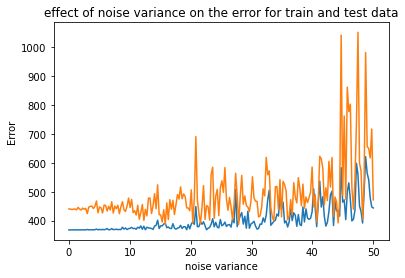

In [12]:
# plotting the effect of noise variance on the error

train_error = np.zeros(200,)
test_error = np.zeros(200,)
range_noise = np.linspace(0,50,200)
k = 0

for i in range_noise:
    
    Noise = np.random.normal(0,i,len(Ozon))
    train_noise = Noise[0:int(0.8*len(Ozon))]
    test_noise = Noise[int(0.8*len(Ozon)): len(Ozon)+1]
    
    Y_train_noisy = Y_train + train_noise
    Y_test_noisy = Y_test + test_noise
    
    beta_noisy = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train_noisy)
    
    tmp = Y_train - np.matmul(X,beta_noisy)
    RSS_train_noisy = np.matmul(tmp.T ,tmp)
    train_error[k] = RSS_train_noisy/len(Y_train)
    
    tmp = Y_test - np.matmul(X_Test,beta_noisy)
    RSS_test_noisy = np.matmul(tmp.T ,tmp)
    test_error[k] = RSS_test_noisy/len(Y_test)
    
    k = k+1
    

plt.plot(range_noise,train_error)
plt.title('effect of noise variance on the error for train data')
plt.xlabel('noise variance')
plt.ylabel('Error')


plt.plot(range_noise,test_error)
plt.title('effect of noise variance on the error for train and test data')
plt.xlabel('noise variance')
plt.ylabel('Error')

در بلوک بعدی ویژگی پیچیده تری که توان 2 ویژگی های قبل هست را اضافه می کنیم که باعث شده است مدل در تخمین خروجی بهتر عمل کند و خطا های آموزش و تست هردو کاهش یافته اند.

In [71]:
# Adding power 2 elements to X 

X = np.hstack((X_train,X_train**2))
X = np.insert(X, 0, np.ones(len(X_train)), axis=1)
new_beta = np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T) , Y_train)
print(new_beta)

X_Test = np.hstack((X_test,X_test**2))
X_Test = np.insert(X_Test, 0, np.ones(len(X_test)), axis=1)


y_hat_train_new = np.matmul(X,new_beta)
y_hat_test_new = np.matmul(X_Test,new_beta)

# RSS

RSS_train_new = np.matmul((Y_train - y_hat_train_new).T , (Y_train - y_hat_train_new))
RSS_train_new = RSS_train_new/len(Y_train)
print(RSS_train_new)

RSS_test_new = np.matmul((Y_test - y_hat_test_new).T , (Y_test - y_hat_test_new))
RSS_test_new = RSS_test_new/len(Y_test)
print(RSS_test_new)

[ 2.80398341e+02  1.31995917e-01 -6.59702712e+00 -1.00164921e+01
 -2.80324286e-04  5.26295938e-02  3.37151192e-01]
189.81570946761178
251.7171617365478


در قسمت بعدی در این بلوک ابتدا دیتای فریم های افراد را خوانده و برای هر شخص داده هایش را با گام خطی از 0 تا 1 لیبل هم میزنیم که از حالت خنثی تا اوج سورپرایز را نشان می دهد.